# King Country House Prediction

This notebook is used for **[House Price Prediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/download?datasetVersionNumber=1)**.

**[Project Link] (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)**

## Data
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.


Data Dictionary
id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

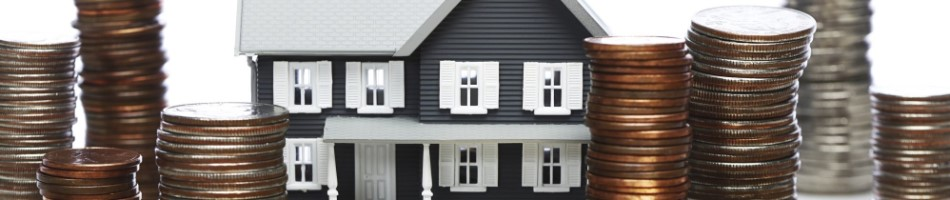

## import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

## listing files

In [10]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\ABD_YZ_Kursu\Day 03 ML-1\Day3StudentFiles

18.02.2024  08:07    <DIR>          .
17.02.2024  09:35    <DIR>          ..
18.02.2024  07:52    <DIR>          .ipynb_checkpoints
17.02.2024  12:46             2.442 car_price_predictor.py
17.02.2024  08:19           141.824 cars.xls
17.02.2024  08:20           732.191 combine.csv
17.02.2024  13:46        16.287.019 Day 3 - Regression.ipynb
17.02.2024  08:21             5.533 heightweight.csv
18.02.2024  08:07           547.633 House Price Prediction.ipynb
17.02.2024  08:21         2.515.206 kc_house_data.csv
18.02.2024  07:53           531.186 KC_House_Predict  send.ipynb
17.02.2024  23:26           193.231 KC_House_Predict.ipynb
17.02.2024  12:07             2.992 model.pkl
17.02.2024  08:21               312 PastHires.csv
17.02.2024  08:21         1.529.169 sales.csv
17.02.2024  22:32                72 Untitled.ipynb
              13 F

In [11]:
pwd

'C:\\Users\\emura\\Documents\\ABD_YZ_Kursu\\Day 03 ML-1\\Day3StudentFiles'

## Import Data

In [ ]:
df=pd.read_csv("kc_house_data.csv")

## EDA Exploratory Data Analysis

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [18]:
df.shape

(21613, 21)

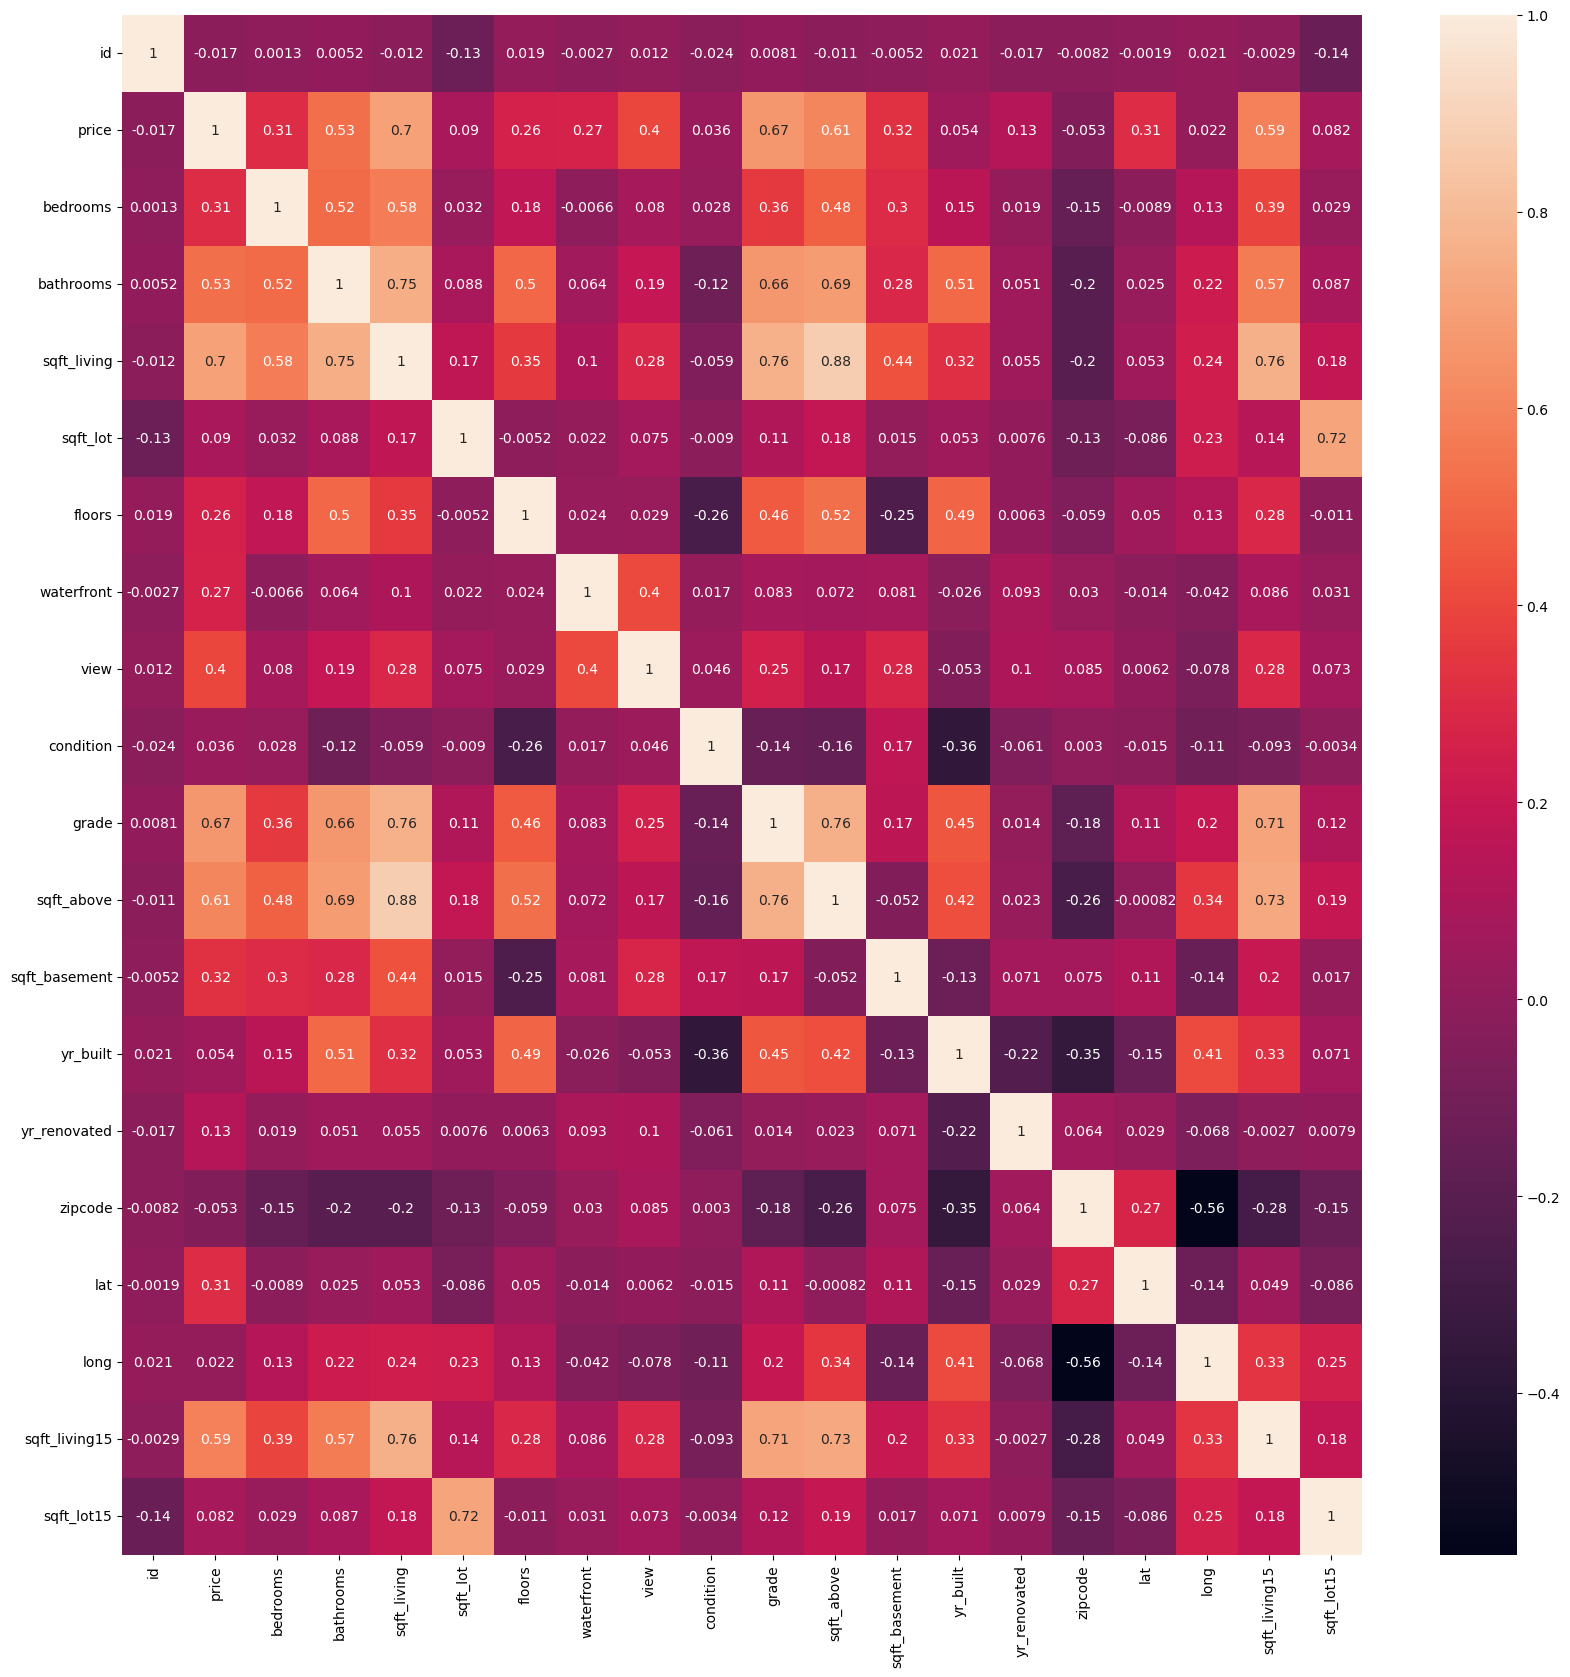

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

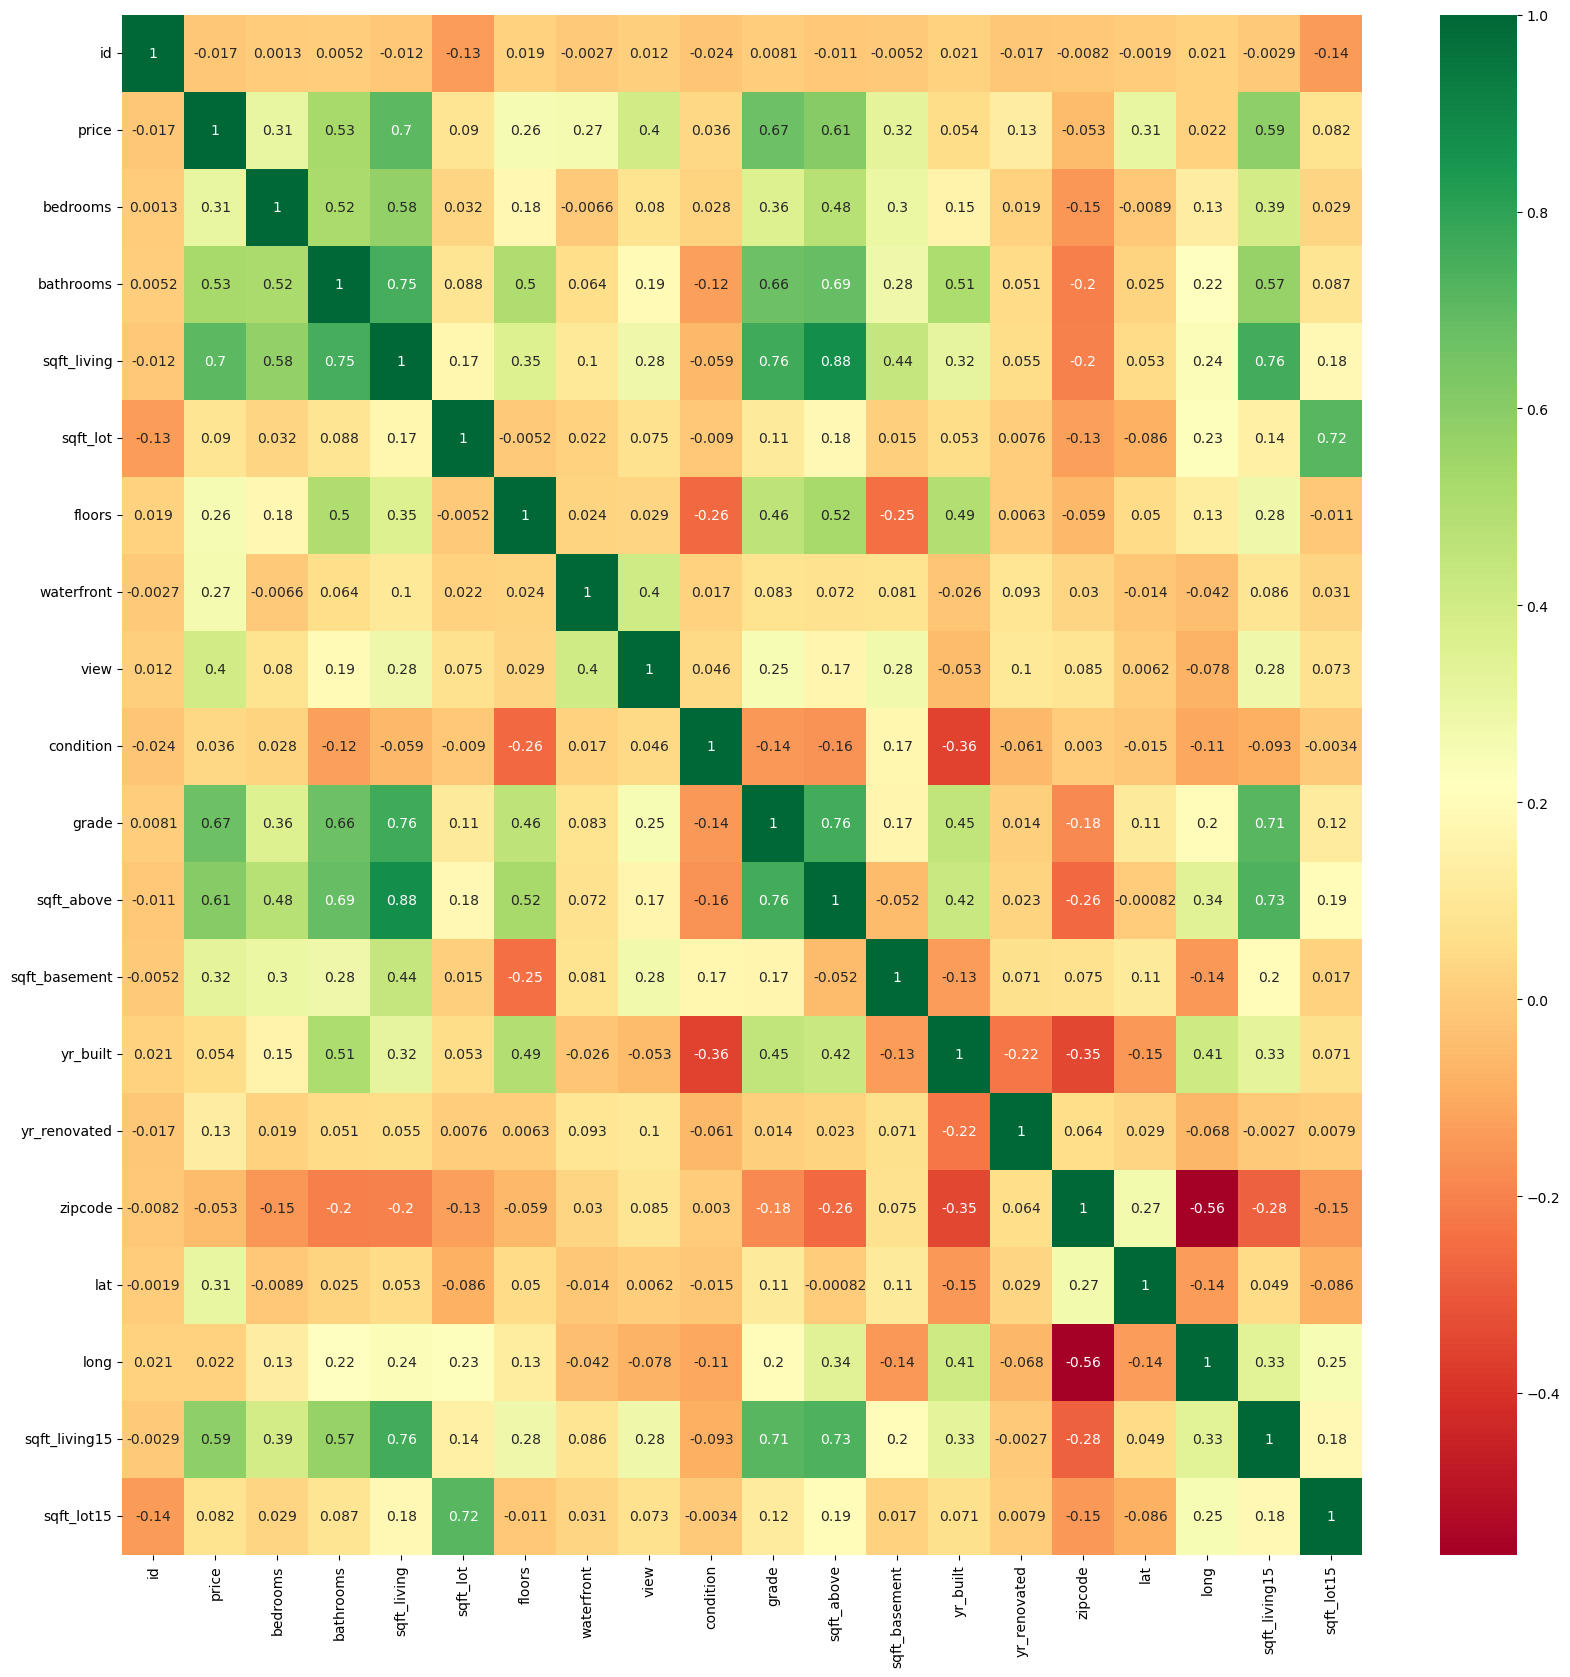

In [23]:
#cmap='RdYlGn'
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') #Red Green yellow
plt.show()

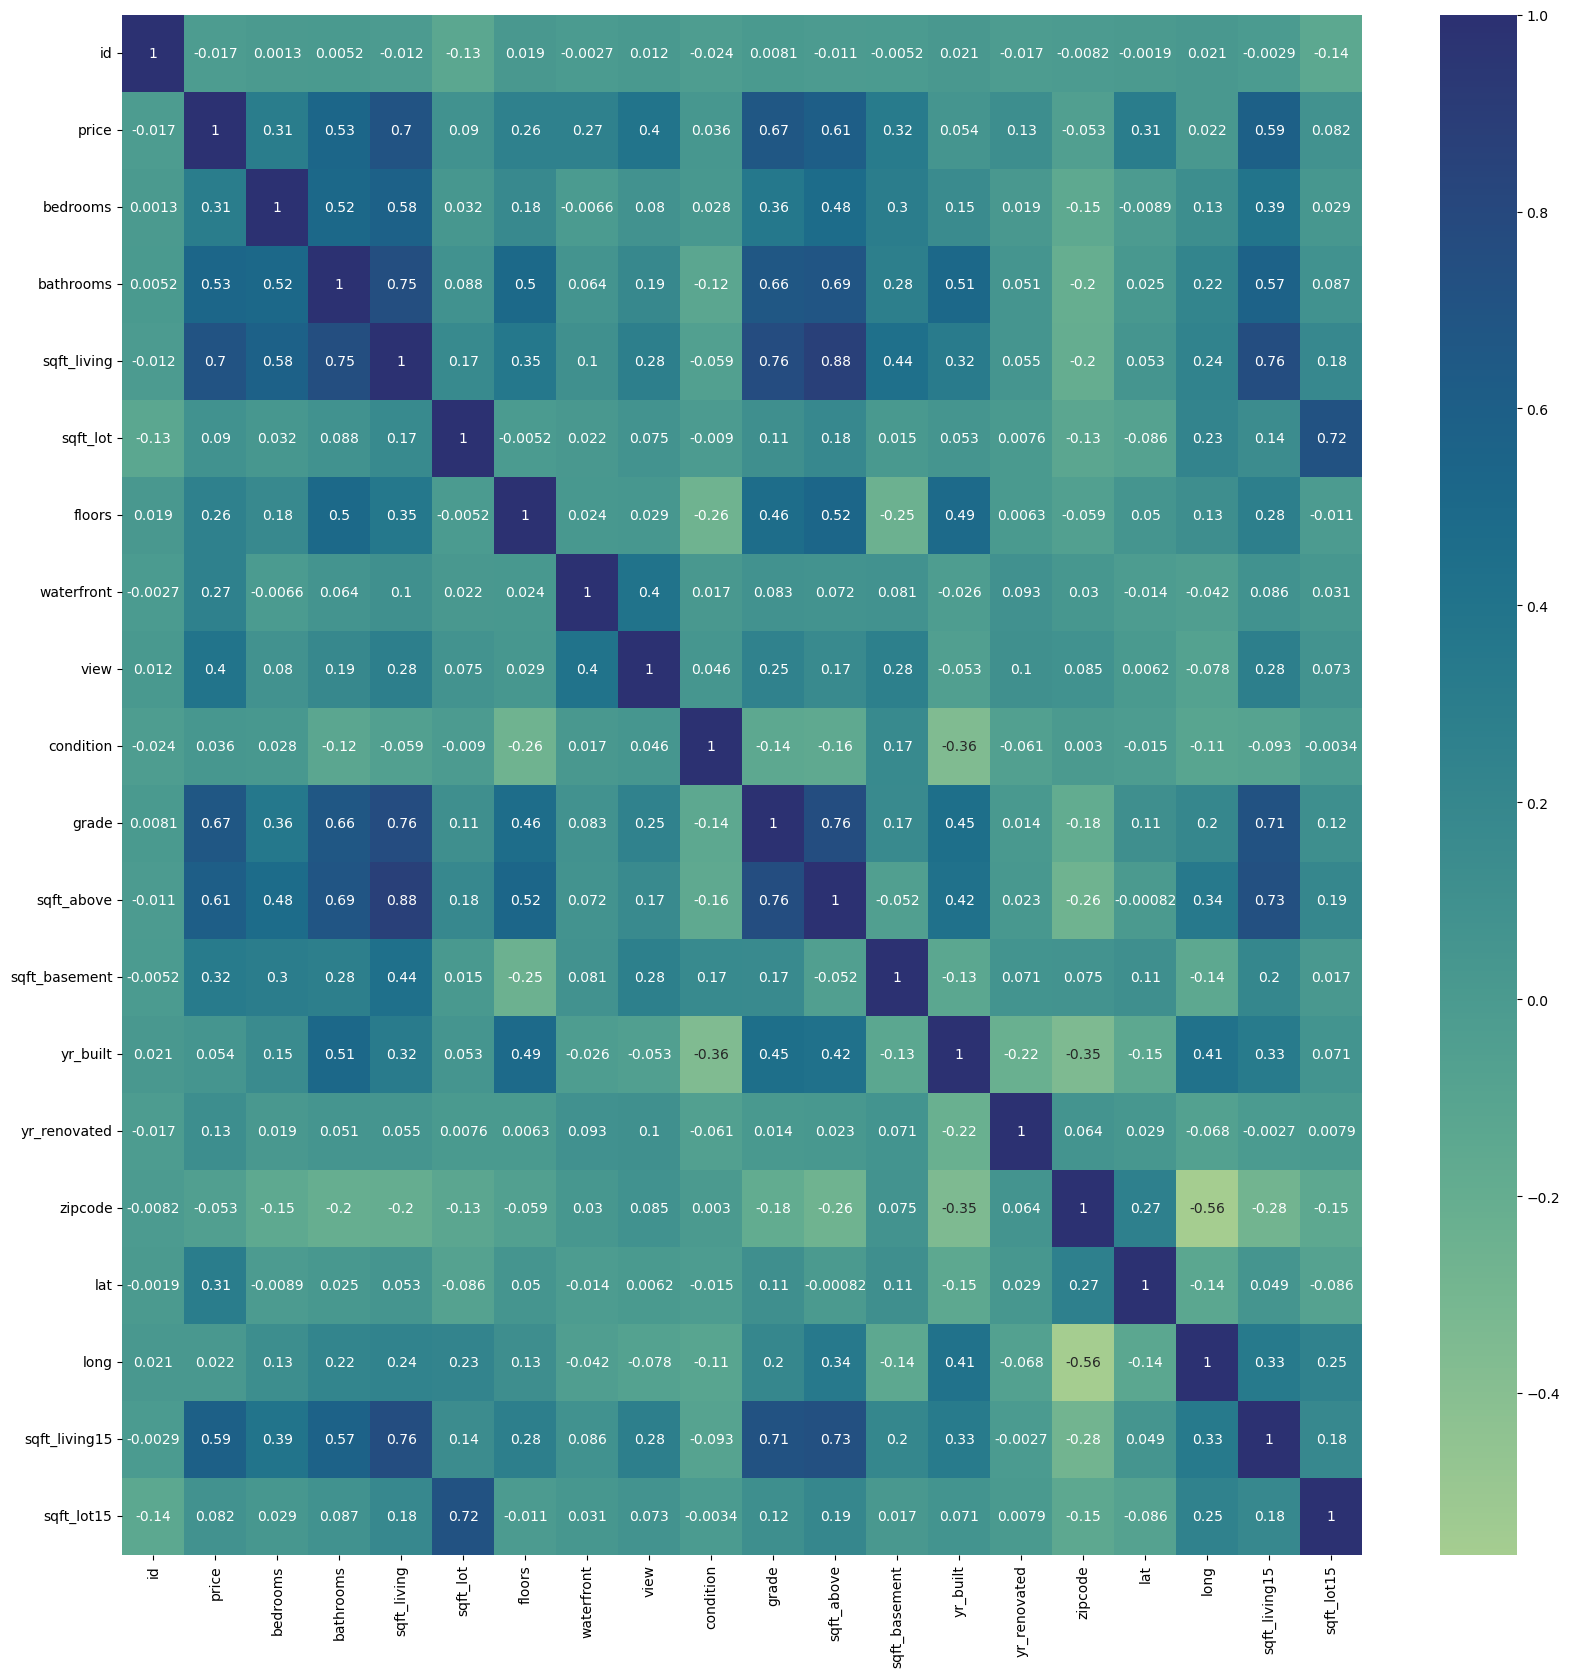

In [24]:
#cmap='RdYlGn'
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

In [25]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [34]:
#Analyze outliers
#bedrooms mea+3*std 
#any data point with more than 3 std from the mean is an outlier

df_bedrooms_outliers=df[df['bedrooms']>(df['bedrooms'].mean() + 3*df['bedrooms'].std())] 
df_bedrooms_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,...,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,...,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,...,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,...,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,...,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,...,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,...,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


In [36]:
df_bedrooms_outliers2=df[df['bedrooms']<(df['bedrooms'].mean() - 3*df['bedrooms'].std())] 
df_bedrooms_outliers2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


<Axes: xlabel='bedrooms'>

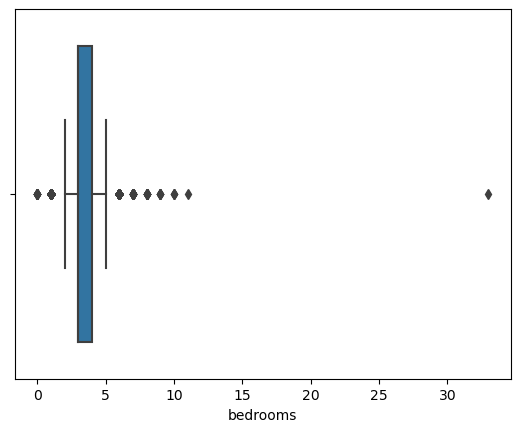

In [39]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='bathrooms'>

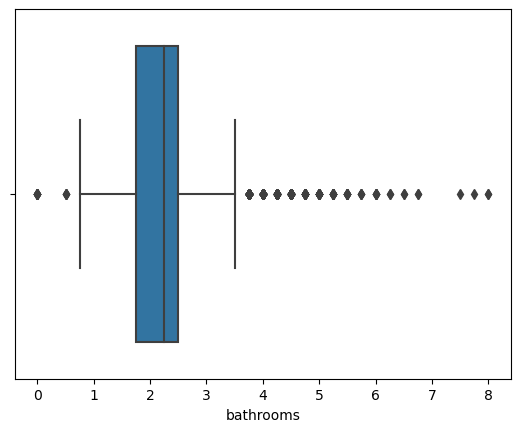

In [40]:
sns.boxplot(x=df['bathrooms'])

<Axes: xlabel='sqft_living'>

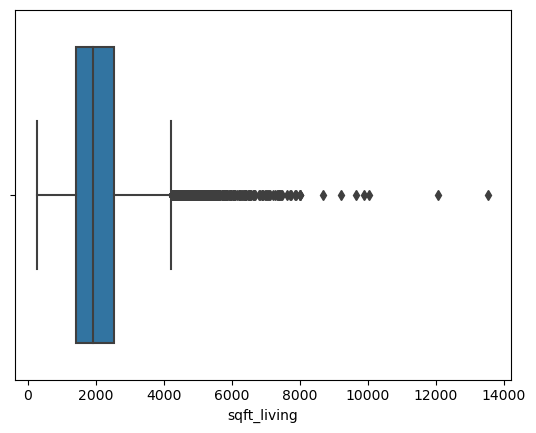

In [41]:
sns.boxplot(x=df['sqft_living'])

<Axes: xlabel='bedrooms', ylabel='Count'>

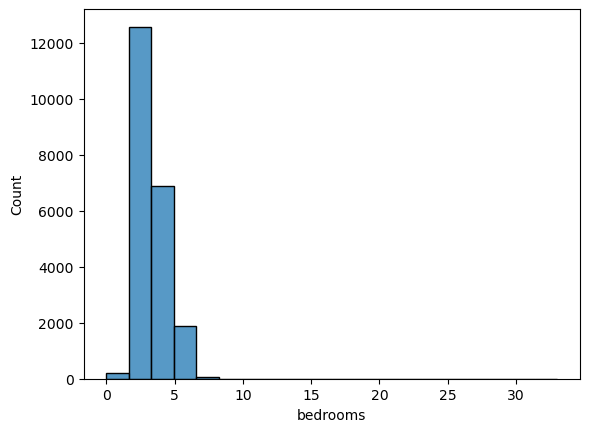

In [48]:
sns.histplot(x=df['bedrooms'], bins=20)

<Axes: xlabel='price', ylabel='Count'>

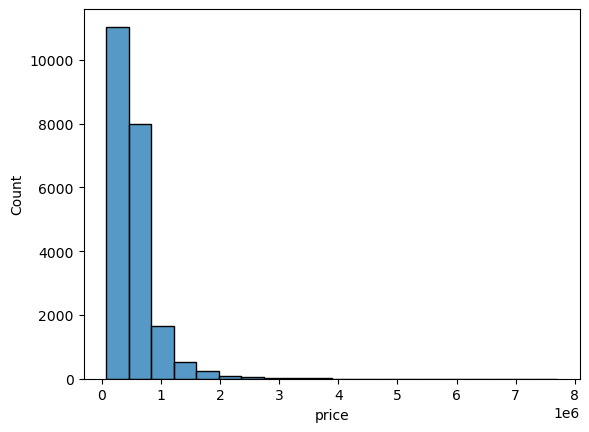

In [50]:
sns.histplot(x=df['price'], bins=20)

## Outliers

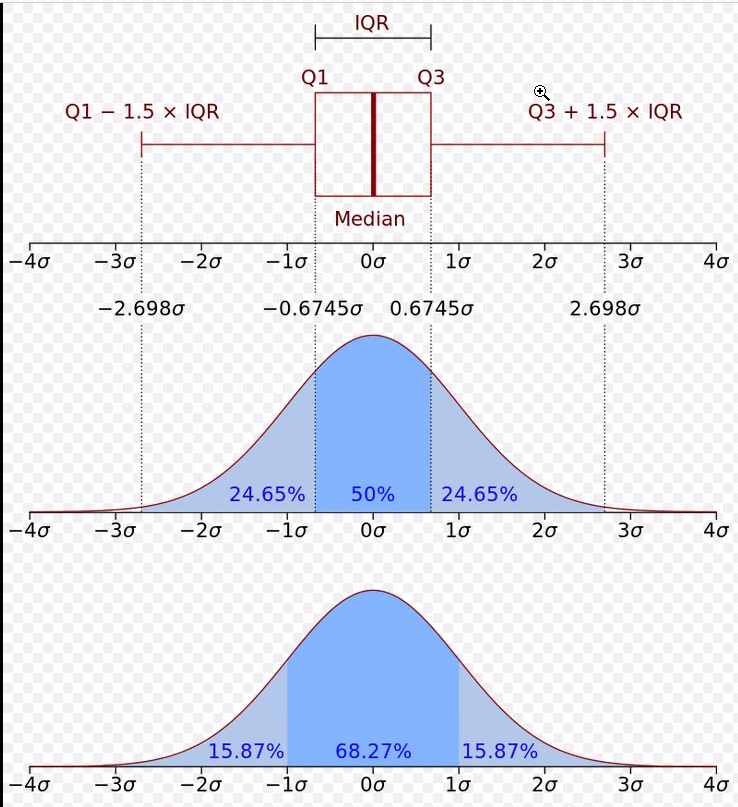

In [49]:
outliers=df.quantile(0.97) # if error then use numeric_only

In [51]:
df=df[df['price']<outliers['price']]

In [53]:
df=df[df['bedrooms']<outliers['bedrooms']]

In [54]:
df=df[df['sqft_living']<outliers['sqft_living']]

In [55]:
df=df[df['bathrooms']<outliers['bathrooms']]

In [56]:
df.shape

(18519, 21)

In [44]:
outliers

id               9.558728e+09
price            1.964400e+06
bedrooms         6.000000e+00
bathrooms        4.250000e+00
sqft_living      4.978800e+03
sqft_lot         2.130080e+05
floors           3.000000e+00
waterfront       0.000000e+00
view             4.000000e+00
condition        5.000000e+00
grade            1.100000e+01
sqft_above       4.370000e+03
sqft_basement    1.660000e+03
yr_built         2.014000e+03
yr_renovated     2.008000e+03
lat              4.777269e+01
long            -1.217830e+02
sqft_living15    4.080000e+03
sqft_lot15       1.576870e+05
Name: 0.99, dtype: float64

In [46]:
df.shape

(21613, 21)

<Axes: xlabel='price', ylabel='Count'>

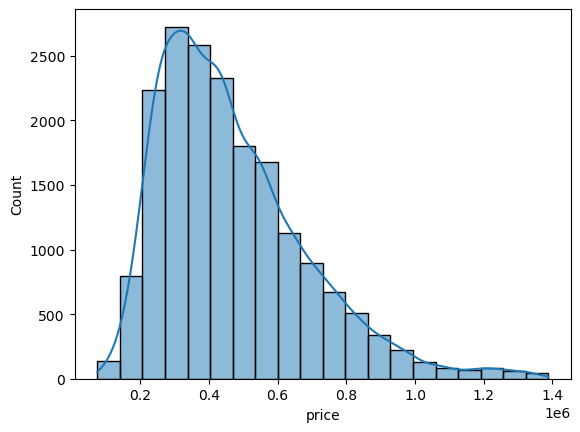

In [59]:
sns.histplot(x=df['price'], bins=20, kde=True)

## Feature Engineering

In [68]:
import datetime

In [71]:
import numpy as np

In [42]:
df['zipcode']=df['zipcode'].astype('category')

https://santafe.craigslist.org/

Dominates features

In [60]:
df['bedrooms']=df['bedrooms']**2

In [61]:
df['bathrooms']=df['bathrooms']**2

In [62]:
df['sqft_living']=df['sqft_living']**2

In [69]:
df['age']=datetime.datetime.now().year-df['yr_built']

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [74]:
#yr_renovated is 0 or 1
df['yr_renovated']=np.where(df['yr_renovated']==0,0,1)

In [73]:
df['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 18519, dtype: int32

In [75]:
df['sqft_basement']=np.where(df['sqft_basement']==0,0,1)

In [76]:
df['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 18519, dtype: int32

In [77]:
y=df['price']

In [78]:
X=df.drop(['price', 'date', 'id','lat','long'],axis=1)

In [80]:
#dummies zip code
X=pd.get_dummies(X,columns=['zipcode'],drop_first=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Modelling

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# defined Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [120]:
def modelling(model, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Training Model
        model.fit(X_train, y_train)
        # predict test data
        predictions = model.predict(X_test)
        # Calculation of Metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        # save results
        results[name] = (mse, rmse, r2)
        # Sonuçları yazdırma
    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")
        print("-" * 50)
    # BEST MODEL
    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [121]:
modelling(models, X_train_scaled, y_train, X_test_scaled, y_test)

Linear Regression: Average RMSE: 87443.19
Linear Regression: R2: 0.83
--------------------------------------------------
Decision Tree: Average RMSE: 135085.99
Decision Tree: R2: 0.60
--------------------------------------------------
Ridge: Average RMSE: 87443.66
Ridge: R2: 0.83
--------------------------------------------------
Lasso: Average RMSE: 87443.40
Lasso: R2: 0.83
--------------------------------------------------
ElasticNet: Average RMSE: 99526.45
ElasticNet: R2: 0.78
--------------------------------------------------

Best Performing Model: Linear Regression with Average RMSE: 87443.19 and R2: 0.83


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        lgbm= LGBMRegressor()
        rf=RandomForestRegressor()
        
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,lgbm,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','Decision Tree',
                    'XGBRegressor', 'LGBMRegressor','RandomForestRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [139]:
algo_test(X,y);

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1697
[LightGBM] [Info] Number of data points in the train set: 14815, number of used features: 84
[LightGBM] [Info] Start training from score 469847.872427


,R_Squared,RMSE,MAE
XGBRegressor,0.842439,84547.143342,59470.452421
LGBMRegressor,0.835408,86413.069852,61056.532591
Linear,0.831460,87443.194176,62911.771624
Lasso,0.831447,87446.738611,62907.022363
Ridge,0.830644,87654.713875,63086.346449
RandomForestRegressor,0.805189,94011.761874,65589.237112
Gradient Boosting,0.751615,106154.385054,80367.962815
Extra Tree,0.666762,122956.727207,83392.772948
Decision Tree,0.594461,135641.174329,93254.510259
ElasticNet,0.563314,140753.644536,108692.627414


## Evaluate model

In [143]:
xgb=XGBRegressor()
predicts=xgb.fit(X_train,y_train).predict(X_test)

In [123]:
residuals=y_test-predicts

<Axes: xlabel='price', ylabel='Count'>

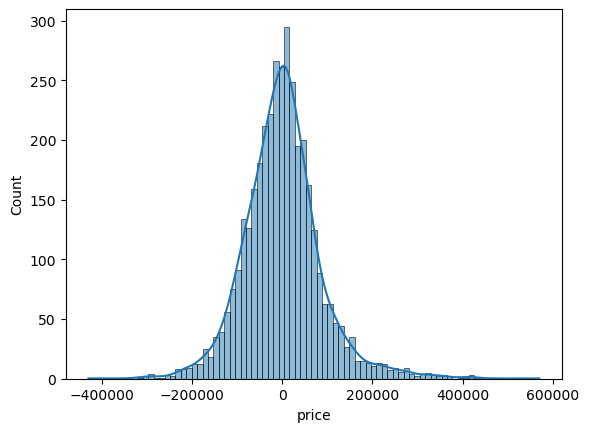

In [124]:
sns.histplot(residuals, kde=True)

In [125]:
#test normal distrubution test
from scipy.stats import normaltest
normaltest(residuals)

NormaltestResult(statistic=525.994154900641, pvalue=6.050907398350056e-115)

In [126]:
#shapiro-wilk test
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9566354155540466, pvalue=7.230078426519295e-32)